In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

## To Download the Dataset :
[Chick Here](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)


In [64]:
import numpy as np
import struct

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load the data
X_train = load_mnist_images(r"C:\Users\nasir\Downloads\archive\train-images.idx3-ubyte")
Y_train = load_mnist_labels(r"C:\Users\nasir\Downloads\archive\train-labels.idx1-ubyte")

X_test = load_mnist_images(r"C:\Users\nasir\Downloads\archive\t10k-images.idx3-ubyte")
Y_test = load_mnist_labels(r"C:\Users\nasir\Downloads\archive\t10k-labels.idx1-ubyte")

# Verify the shapes of the loaded data
print(X_train.shape)  # Should print (60000, 28, 28) for MNIST
print(Y_train.shape)  # Should print (60000,) for MNIST
print(X_test.shape)   # Should print (10000, 28, 28) for MNIST
print(Y_test.shape)   # Should print (10000,) for MNIST



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


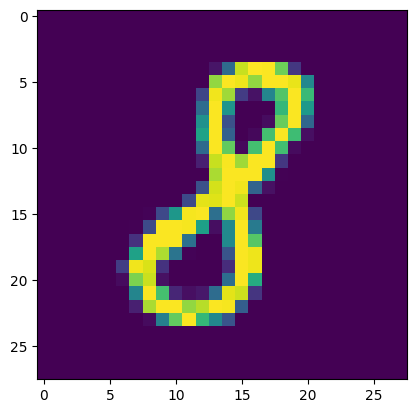

In [65]:
X_train
idx = random.randint(0, 60000)
plt.imshow(X_train[idx, :])
plt.show()

In [66]:
model=Sequential([
    MaxPooling2D((2,2),input_shape=(28, 28, 1)),
    Conv2D(16,(5,5),activation='relu',),
    MaxPooling2D((2,2)),
    Conv2D(120,(5,5),activation='relu'),
    Flatten(),
    Dense(84,activation='relu'),
    Dense(10,activation='softmax'),
    # Dense(1,activation='softmax')
    
    ])

In [67]:

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [68]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8447 - loss: 1.0218
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9687 - loss: 0.1037
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.0795
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.0658
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9800 - loss: 0.0625
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9820 - loss: 0.0550
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9825 - loss: 0.0510
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0455
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9859 - loss: 0.0439
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9871 - loss: 0.0411


In [69]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.1229


[0.09168487787246704, 0.9769999980926514]

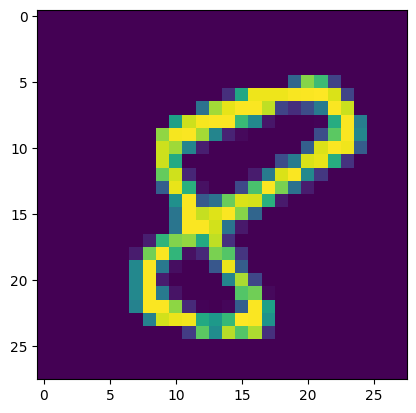

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Our model predict it is 8


In [72]:
idx2 = random.randint(0, 400)
plt.imshow(X_test[idx2, :])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,28,28))
predicted_class = np.argmax(y_pred)
print('Our model predict it is',predicted_class)